In [60]:
# 导入相关的包
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import os
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np

In [9]:
# 利用GPU训练
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [14]:
transform = torchvision.transforms.Compose([
    ToTensor()
])
# 准备数据
train_data = torchvision.datasets.MNIST(root="../数据集/mnist", train=True, transform=transform,
                                        download=True)
test_data = torchvision.datasets.MNIST(root="../数据集/mnist", train=False, transform=transform,
                                       download=True)

# 查看数据集长度
train_data_size = len(train_data)
test_data_size = len(test_data)
print(f"训练数据集长度为{train_data_size}")
print(f"测试数据集长度为{test_data_size}")

训练数据集长度为60000
测试数据集长度为10000


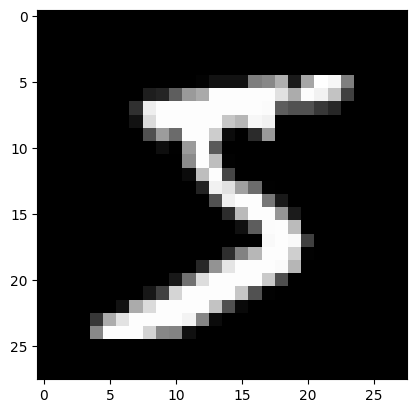

torch.Size([28, 28])


In [53]:
# 查看第一张图片
img, target = train_data[0]
img.squeeze_(0)
# #转为numpy类型
plt.imshow(img, cmap='gray')
# plt.title(f"Label: {target}")
plt.show()
print(img.shape)
# 将图片移动到设备上
# img = img.unsqueeze(0).to(device)  # 添加一个维度，以便适应模型的输入要求，并移动到设备上
# print(img.shape)
# target = torch.tensor([target]).to(device)

In [12]:
# 创建数据加载器
train_dataloader = DataLoader(train_data, batch_size=1)
test_dataloader = DataLoader(test_data, batch_size=1)

In [26]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, 5, 1, 2),
            nn.Sigmoid(),
            nn.AvgPool2d(2, 2),
            nn.Conv2d(6, 16, 5, 1, 0),
            nn.Sigmoid(),
            nn.AvgPool2d(2, 2),
            nn.Flatten(),
            nn.Linear(16 * 5 * 5, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        features = []
        for module in self.model:
            x = module(x)
            if isinstance(module, (nn.Conv2d, nn.AvgPool2d)):
                features.append(x)
        return x,features
# 实例化网络
lenet = LeNet()
lenet = lenet.to(device)

In [37]:
# 前向传播
output, features = lenet(img)
print(output)
# print(features[0].shape)
for i in range(len(features)):
    print(features[i].shape)

tensor([[-0.4816,  0.2357,  0.4632,  0.3059, -0.3904,  0.2528,  0.0789, -0.3531,
         -0.1197, -0.2773]], device='cuda:0', grad_fn=<AddmmBackward0>)
torch.Size([1, 6, 28, 28])
torch.Size([1, 6, 14, 14])
torch.Size([1, 16, 10, 10])
torch.Size([1, 16, 5, 5])


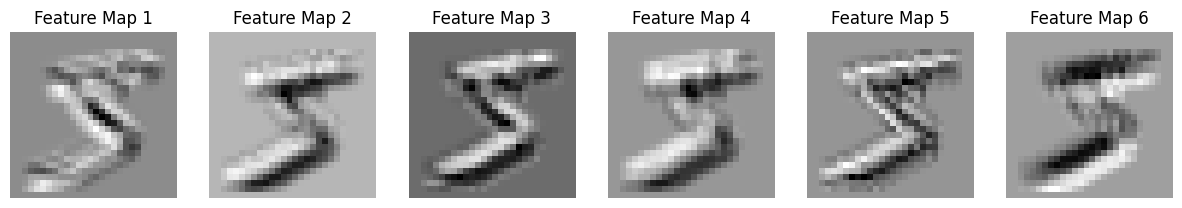

In [78]:
feature_maps = features[0] 

# 创建一个画布，每行显示一张特征图
fig, axs = plt.subplots(1, 6, figsize=(15, 2.5))

# 遍历每张特征图并展示

for i in range(6):
    ax = axs[i]
    # 获取第 i 张特征图并转换为numpy数组
    feature_map = feature_maps[0, i, :, :].cpu().detach().numpy()
    # 由于特征图是单通道的，我们需要将其转换为灰度图像
    ax.imshow(feature_map, cmap='gray')
    ax.set_title(f'Feature Map {i + 1}')
    ax.axis('off')  # 不显示坐标轴

plt.show()

In [130]:
def plot_features(features):
    num_layers = len(features)
    for layer_idx, feature_maps in enumerate(features):
        num_feature_maps = feature_maps.size(1)  # 获取该层的特征图数量
        num_rows = (num_feature_maps + 1) // 2  # 计算需要多少行来展示所有特征图
        fig, axs = plt.subplots(1, 16, figsize=(15,1.5))  # 创建画布
        axs = axs.flatten()  # 将axs转换为一维数组，方便索引
        for i in range(num_feature_maps):
            ax = axs[i]
            feature_map = feature_maps[0, i, :, :].cpu().detach().numpy()
            ax.imshow(feature_map, cmap='gray')
            # ax.set_title(f'{i + 1}')
            ax.axis('off')
        
        # 隐藏剩余的子图（如果有的话）
        for i in range(num_feature_maps, len(axs)):
            axs[i].axis('off')
        
        plt.suptitle(f'Layer {layer_idx + 1} Feature Maps')
        plt.show()

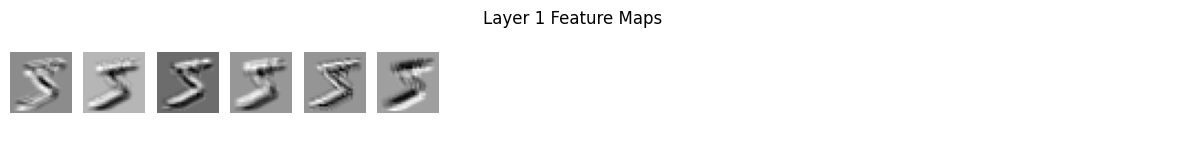

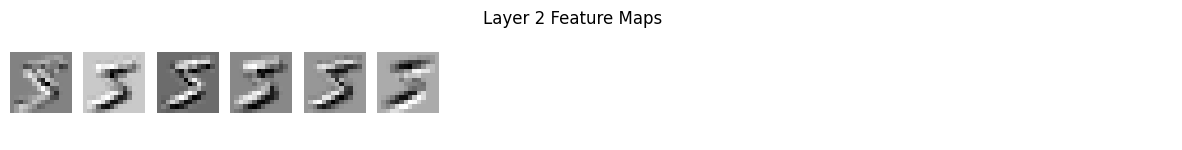

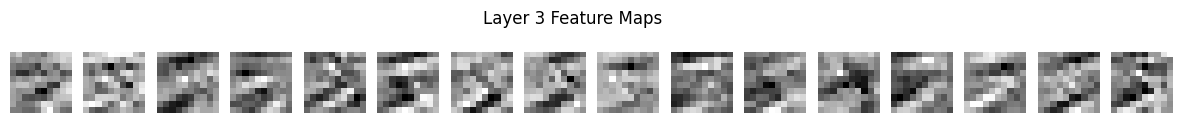

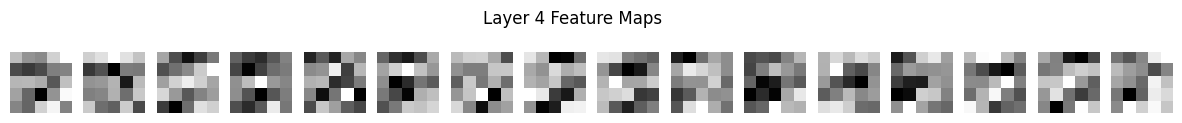

In [131]:
%matplotlib inline
# 调用函数展示所有特征图
plot_features(features)